<a href="https://www.kaggle.com/code/ferasrafeh/cyclistic-case-study?scriptVersionId=116413653" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Cyclistic : How Does a Bike-Share Navigate Speedy Success?

### Table of Contents

1. **[Introduction](#intro)**
2. **[Data Preparation](#prepdata)**
3. **[Data Processing](#process)**
4. **[Descriptive Analysis](#analysis)**
5. **[Data Visualizations](#visualize)**
6. **[Conclusion](#diff)**
7. **[Recommendations](#recomm)**

# Introduction <a class="anchor"  id="intro"></a>

This is a case study for the Google Data Analytics Certification. Data analysis using R was made for a fictional bike-sharing company called Cyclistic.

The **key business task** in this case study is to find out how casual riders and members of Cyclistic use their rental bikes differently. The Marketing Director of Cyclistic and the finance analysts have concluded that annual members are much more profitable than casual riders.

The Marketing Director has set a clear **goal** to design marketing strategies aimed at converting casual riders into annual members. 

Therefore, we will be analyzing historical bike trip data to identify trends. The results of this analysis will be used to design a new marketing strategy to convert casual riders to annual members.

This document shows the steps taken to prepare, process, analyze, and visualize the data sets. Moreover, conclusions and recommendations were made. 

Data collected between Jan 2022 and Dec 2022 of a real bike sharing company called "Divvy" will be assessed. I uploaded the monthly data for year 2022 on Kaggle.

Data Source: [Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html)

License: [Data License Agreement](https://ride.divvybikes.com/data-license-agreement)

Due to the fact that this is a case study using public data, we are going to assume the data is credible.


In [1]:
# Installing and loading libraries
install.packages("tidyverse")
install.packages("readr")
library(tidyverse)  
library(lubridate)  
library(ggplot2)  
library(readxl)
library(dplyr)
library(readr)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following 

# Data Preparation <a class="anchor"  id="prepdata"></a>

In [2]:
# Loading data
Jan_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202201-divvy-tripdata/202201-divvy-tripdata.csv")
Feb_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202202-divvy-tripdata/202202-divvy-tripdata.csv")
Mar_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202203-divvy-tripdata/202203-divvy-tripdata.csv")
Apr_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202204-divvy-tripdata/202204-divvy-tripdata.csv")
May_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202205-divvy-tripdata/202205-divvy-tripdata.csv")
Jun_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202206-divvy-tripdata/202206-divvy-tripdata.csv")
Jul_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202207-divvy-tripdata/202207-divvy-tripdata.csv")
Aug_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202208-divvy-tripdata/202208-divvy-tripdata.csv")
Sep_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202209-divvy-tripdata/202209-divvy-publictripdata.csv")
Oct_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202210-divvy-tripdata/202210-divvy-tripdata.csv")
Nov_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202211-divvy-tripdata/202211-divvy-tripdata.csv")
Dec_22 <- read_csv("/kaggle/input/divvy-monthly-data-2022/202212-divvy-tripdata/202212-divvy-tripdata.csv")

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

# Data Processing   <a class="anchor"  id="process"></a>

Checking if column names are consistent before merging

In [3]:
colnames(Jan_22)
colnames(Feb_22)
colnames(Mar_22)
colnames(Apr_22)
colnames(May_22)
colnames(Jun_22)
colnames(Jul_22)
colnames(Aug_22)
colnames(Sep_22)
colnames(Oct_22)
colnames(Nov_22)
colnames(Dec_22)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Column names are consistent

Checking if data types across all data sets are consistent before merging

In [4]:
str(Jan_22)
str(Feb_22)
str(Mar_22)
str(Apr_22)
str(May_22)
str(Jun_22)
str(Jul_22)
str(Aug_22)
str(Sep_22)
str(Oct_22)
str(Nov_22)
str(Dec_22)

spc_tbl_ [103,770 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:103770] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:103770] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:103770], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:103770], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:103770] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:103770] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:103770] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:103770] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:103770] 42 

The structures are consistent

Merging the data sets into one

In [5]:
# Merge all data sets 
all_trips <- bind_rows(
  Aug_22, Sep_22, Oct_22, Nov_22, Dec_22, 
  Jan_22, Feb_22, Mar_22, Apr_22, May_22, Jun_22, Jul_22
)

Removing the lat and long columns as this data was dropped beginning of 2020

In [6]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

#### Adding columns to generate trends

Next, adding columns that list the date, month, day, and year for each ride. This will allow us to aggregate ride data for each month, day, or year.

In [7]:
# Adding date column
all_trips$date <- as.Date(all_trips$started_at)

# Adding month column
all_trips$month <- format(
  all_trips$date,
  "%m"
  )

# Adding day column
all_trips$day <- format(
  all_trips$date,
  "%d"
  )

# Adding year column
all_trips$year <- format(
  all_trips$date,
  "%Y"
  )

Month, Day, and Year columns appear to be stored as "chr", converting them to "num"

In [8]:
 all_trips$month <- as.numeric(all_trips$month)

all_trips$day <- as.numeric(all_trips$day)

all_trips$year <- as.numeric(all_trips$year)

Adding day_of_week column and ride_length column to help generate trends

In [9]:
# Returns the day of the week
all_trips$day_of_week <- lubridate::wday(all_trips$date, label = TRUE)

# Calculates ride duration in seconds
all_trips$ride_length <- difftime(
  all_trips$ended_at,
  all_trips$started_at,
  units="secs"
  )

In [10]:
# Arrange according to date started 
all_trips <- all_trips %>%
  arrange(started_at)

Converting ride_length to a numeric type so that we can run calculations on the data and will also help to identify if there are any invalid data points, i.e. ride lengths which are less than 0.

In [11]:
# Convert ride_length to numeric
all_trips$ride_length <- as.numeric(all_trips$ride_length)

#### Cleaning the dataset

Removing rows with ride length < 0

In [12]:
all_trips_clean <- all_trips %>% 
  filter(!(ride_length < 0))

Next, removing maintenance rows. The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy, we need to remove these data points.

In [13]:
all_trips_clean <- all_trips_clean %>% 
  filter(!(start_station_name == "HQ QR"))

Next, removing incomplete rows

In [14]:
all_trips_clean <- all_trips_clean %>%
  filter(
    !(is.na(start_station_name) |
        start_station_name == "")
  ) %>% 
  
  filter(
    !(is.na(end_station_name) |
        end_station_name == "")
  )

Checking and Removing duplicates

In [15]:
nrow(all_trips_clean)
n_distinct(all_trips_clean$ride_id)

[1] 4369291

[1] 4369291

Both output the same number of rows which means that there are no duplicates.


#### Creating data frames to generate trends

Creating a data frame for unique station names with their count

In [16]:
unique_station_name <- all_trips_clean %>%
  group_by(start_station_name) %>%
  count(start_station_name)

Next, creating data frames that list the start station names used each month and their corresponding count

In [17]:
# For Jan_22
Jan_22_stations <- all_trips_clean %>%
  filter(
    month == "1"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Feb_22
Feb_22_stations <- all_trips_clean %>%
  filter(
    month == "2"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Mar_22
Mar_22_stations <- all_trips_clean %>%
  filter(
    month == "3"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Apr_22
Apr_22_stations <- all_trips_clean %>%
  filter(
    month == "4"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For May_22
May_22_stations <- all_trips_clean %>%
  filter(
    month == "5"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Jun_22
Jun_22_stations <- all_trips_clean %>%
  filter(
    month == "6"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Jul_22
Jul_22_stations <- all_trips_clean %>%
  filter(
    month == "7"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Aug_22
Aug_22_stations <- all_trips_clean %>%
  filter(
    month == "8"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Sep_22
Sep_22_stations <- all_trips_clean %>%
  filter(
    month == "9"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Oct_22
Oct_22_stations <- all_trips_clean %>%
  filter(
    month == "10"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Nov_22
Nov_22_stations <- all_trips_clean %>%
  filter(
    month == "11"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

# For Dec_22
Dec_22_stations <- all_trips_clean %>%
  filter(
    month == "12"
  ) %>%
  group_by(
    start_station_name
  ) %>%
  count(
    start_station_name
  )

Creating columns for each month in the unique_station_name data frame to check which start station names per month were and were not used

In [18]:
# Jan_22 Column
unique_station_name$Jan_22 <- as.integer(unique_station_name$start_station_name
                                          %in% Jan_22_stations$start_station_name)
# Feb_22 Column
unique_station_name$Feb_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Feb_22_stations$start_station_name)
# Mar_22 Column
unique_station_name$Mar_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Mar_22_stations$start_station_name)
# Apr_22 Column
unique_station_name$Apr_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Apr_22_stations$start_station_name)
# May_22 Column
unique_station_name$May_22 <- as.integer(unique_station_name$start_station_name
                                         %in% May_22_stations$start_station_name)
# Jun_22 Column
unique_station_name$Jun_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Jun_22_stations$start_station_name)
# Jul_22 Column
unique_station_name$Jul_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Jul_22_stations$start_station_name)
# Aug_22 Column
unique_station_name$Aug_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Aug_22_stations$start_station_name)
# Sep_22 Column
unique_station_name$Sep_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Sep_22_stations$start_station_name)
# Oct_22 Column
unique_station_name$Oct_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Oct_22_stations$start_station_name)
# Nov_22 Column
unique_station_name$Nov_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Nov_22_stations$start_station_name)
# Dec_22 Column
unique_station_name$Dec_22 <- as.integer(unique_station_name$start_station_name
                                         %in% Dec_22_stations$start_station_name)

 Creating a sum column for the unique_station_name data frame. The sum column will help in checking how many stations in total were used during each month of year 2022.

In [19]:
unique_station_name$sum <- rowSums(unique_station_name[ ,c(3:14)])

We notice from the unique_station_name data set that some stations like "10101 S Stony Island Ave" was used only once in August during the whole year of 2022. 
These stations could have been trial stations that are not there anymore or have been added/removed. Further analysis needed.

Creating a new column called "route" by merging the start_station_name and end_station_name could help us find the most popular routes among riders during analysis.

In [20]:
all_trips_clean$route <- paste(all_trips_clean$start_station_name,
                               all_trips_clean$end_station_name,
                               sep = " to ")

#  Saving the data sets  

In [21]:
# Saving clean data set
fwrite(all_trips_clean, 
       "all_trips_clean.csv",
       col.names = TRUE, 
       row.names = FALSE)

In [22]:
# Saving old data set
fwrite(all_trips,
       "all_trips.csv",
       col.names = TRUE,
       row.names = FALSE)

In [23]:
# Save unique_station_name dataset
fwrite(unique_station_name,
       "unique_station_name.csv",
       col.names = TRUE,
       row.names = FALSE)

#  Conducting descriptive analysis  <a class="anchor"  id="analysis"></a>

Finding the max,min,median, and mean of ride_length

In [24]:
summary(all_trips_clean$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     363     636    1026    1141 2061244 

Comparing average ride_length across user types

In [25]:
aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual, FUN = mean)

all_trips_clean$member_casual,all_trips_clean$ride_length
<chr>,<dbl>
casual,1439.586
member,747.104


We notice that casual riders take longer rides on average.

Comparing median of ride_length across user types

In [26]:
aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual, FUN = median)

all_trips_clean$member_casual,all_trips_clean$ride_length
<chr>,<dbl>
casual,831
member,539


Comparing maximum ride_length across user types

In [27]:
aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual, FUN = max)

all_trips_clean$member_casual,all_trips_clean$ride_length
<chr>,<dbl>
casual,2061244
member,89594


Comparing minimum ride_length across user types

In [28]:
aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual, FUN = min)

all_trips_clean$member_casual,all_trips_clean$ride_length
<chr>,<dbl>
casual,0
member,0


Comparing average ride_length for each day for each usertype

In [29]:
aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual + all_trips_clean$day_of_week, FUN = mean)

all_trips_clean$member_casual,all_trips_clean$day_of_week,all_trips_clean$ride_length
<chr>,<ord>,<dbl>
casual,Sun,1633.6491
member,Sun,831.0463
casual,Mon,1490.0468
member,Mon,721.9727
casual,Tue,1286.5190
member,Tue,707.4686
casual,Wed,1243.0783
member,Wed,710.8143
casual,Thu,1284.2069


We can see that casual riders take longer rides on average during each day of the week.

Comparing number of rides & avgerage ride duration for each user type for each day

In [30]:
all_trips_clean %>% 
  group_by(member_casual, day_of_week) %>%                            
  summarise(number_of_rides = n(),          
            average_duration = mean(ride_length),
            .groups="drop") %>%         
            arrange(member_casual,day_of_week)            

member_casual,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,301296,1633.6491
casual,Mon,210757,1490.0468
casual,Tue,196380,1286.5190
casual,Wed,203576,1243.0783
casual,Thu,230005,1284.2069
casual,Fri,248796,1341.4274
casual,Sat,367340,1605.9639
member,Sun,297722,831.0463
member,Mon,375168,721.9727


We notice that casual riders have a higher number of rides than members on Saturday and Sunday. 

#### Export summary file for further analysis

Creating the summary file

In [31]:
summary_file <- aggregate(all_trips_clean$ride_length ~ all_trips_clean$member_casual + all_trips_clean$day_of_week, FUN = mean) 

Changing the column names of the summary file

In [32]:
colnames(summary_file) <- c("User_Type","Week_Day","Average_Ride_Length")

Saving the summary file

In [33]:
fwrite(summary_file, 
       "summary_file.csv",
       col.names = TRUE, 
       row.names = FALSE)

#  Data Visualizations  <a class="anchor"  id="visualize"></a>

**Visualizing the number of casual riders and member riders**

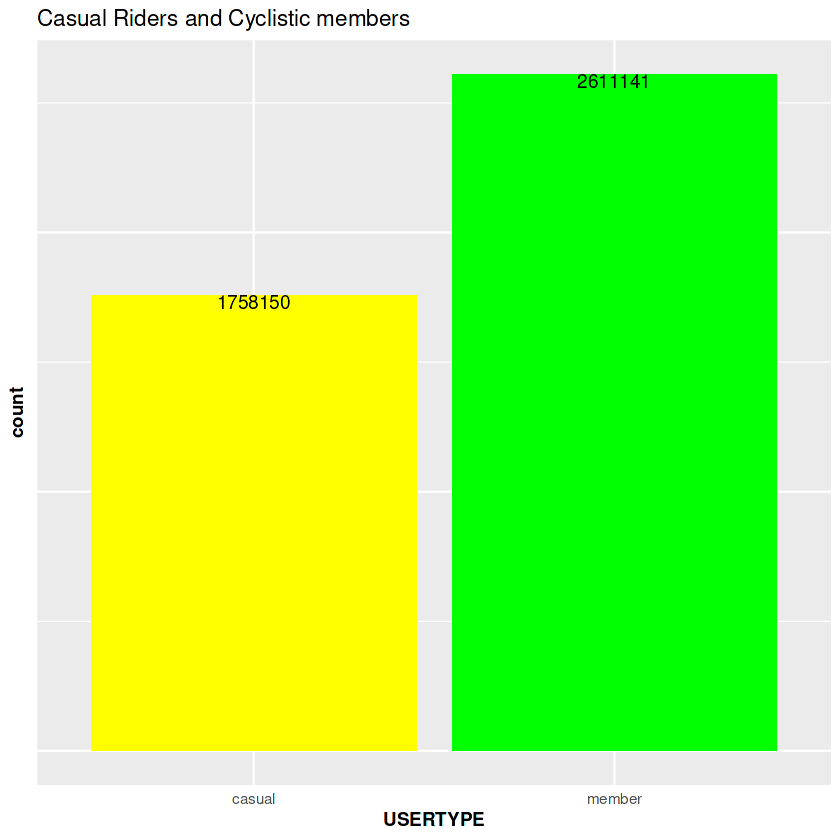

In [34]:
all_trips_clean %>% 
  ggplot(aes(x=member_casual)) +
  geom_bar(fill=c("Yellow","Green")) +
  geom_text(aes(label = after_stat(count)), stat = "count", vjust=1) +
  labs(title = "Casual Riders and Cyclistic members",x="USERTYPE") +
  theme(axis.title = element_text(face="bold"), axis.text.y = element_blank(), axis.ticks=element_blank()) 

We can see that Cyclistic has more members than casual riders.

In [35]:
ggsave("usertypes_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the average duration per week-day for member and casual user-types**

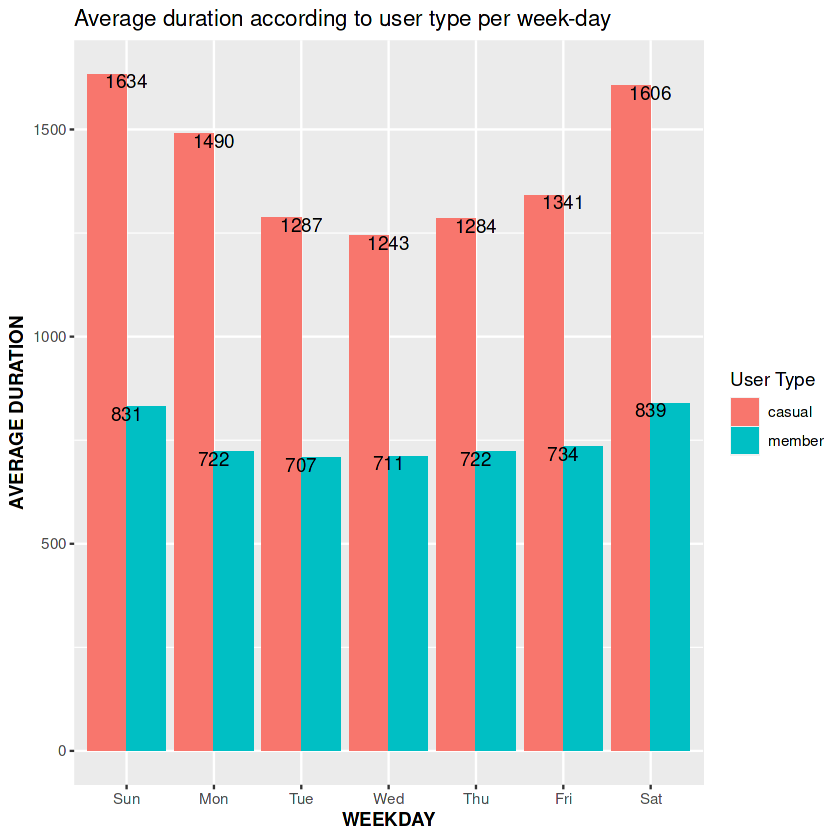

In [36]:
all_trips_clean %>%
  group_by(member_casual,day_of_week) %>%
  summarise(average_duration= mean(ride_length), .groups="drop") %>%
  arrange(member_casual,day_of_week) %>%
  ggplot(aes(x=day_of_week, y=average_duration, fill=member_casual)) +
  geom_col(position="Dodge") +
  labs(title="Average duration according to user type per week-day", y="AVERAGE DURATION", x="WEEKDAY") +
  theme(axis.title = element_text(face="bold")) +
  geom_text(aes(label = round(average_duration, digits = 0)), vjust=1) +
  guides(fill=guide_legend(title="User Type"))

We notice that the average duration for casual riders is higher than that of members for each day of the week. Moreover, the average duration for casual riders and members is the highest during the weekend. 
Sunday is the highest for casual riders and Saturday for members.

In [37]:
ggsave("avg_ride_weekday_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the number of rides per week-day for member and casual user-types**

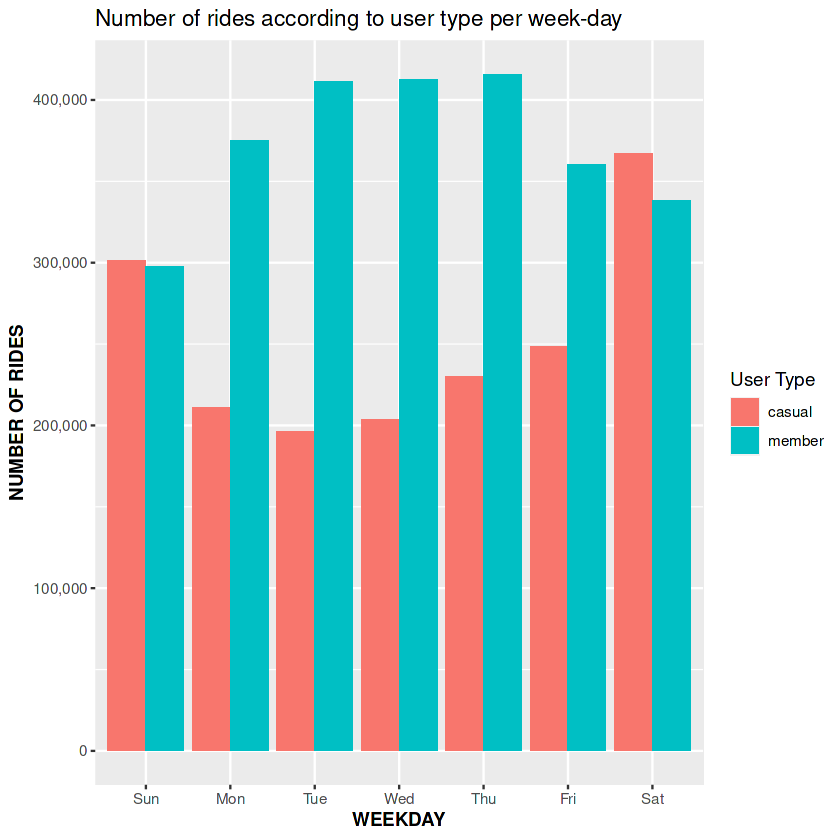

In [38]:
all_trips_clean %>%
  group_by(member_casual,day_of_week) %>%
  summarise(number_of_rides= n(), .groups="drop") %>%
  ggplot(aes(x=day_of_week, y=number_of_rides, fill=member_casual)) +
  geom_col(position="Dodge") +
  scale_y_continuous(labels=function(x) format(x, big.mark = ",", scientific = FALSE)) +
  labs(title="Number of rides according to user type per week-day", x="WEEKDAY", y="NUMBER OF RIDES") +
  theme(axis.title = element_text(face="bold")) +
  guides(fill=guide_legend(title="User Type"))

We can see that the weekend has the highest number of rides for casual riders which is the contrary of members where the numbers of rides during the week is greater.
The number of rides on Sat & Sun for casual riders is even greater than that of members.

In [39]:
ggsave("nb_rides_weekday_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the number of rides member and casual users took each month**

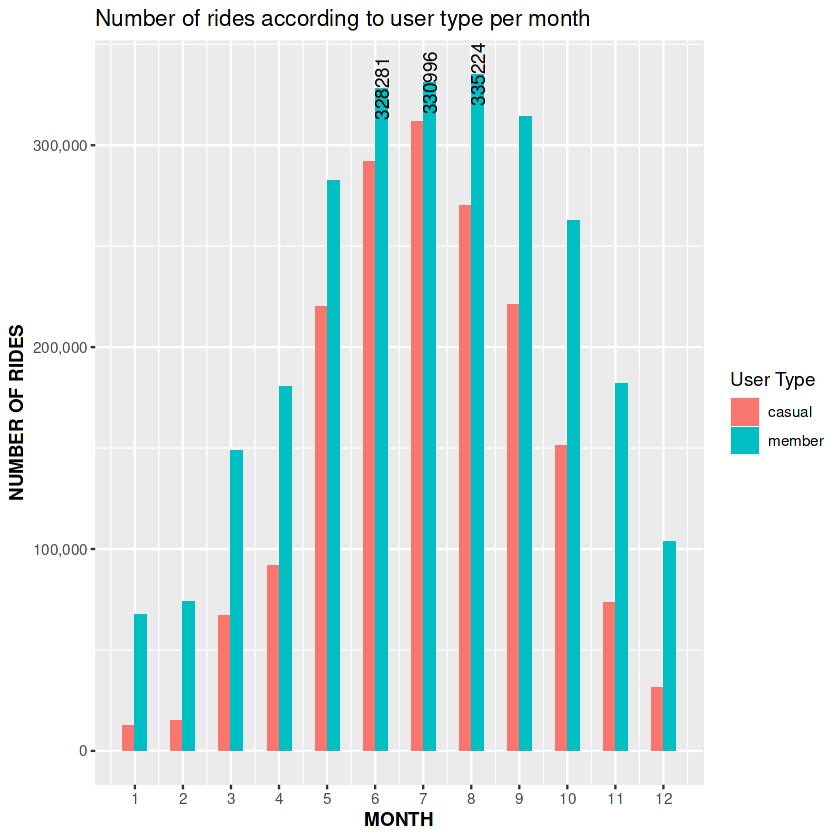

In [40]:
all_trips_clean %>%
  group_by(member_casual,month) %>%
  summarise(number_of_rides= n(), .groups="drop") %>%
  ggplot(aes(x=month, y=number_of_rides, fill=member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels=function(x) format(x, big.mark = ",", scientific = FALSE)) +
  scale_x_continuous(breaks = seq(1, 12, by = 1)) +
  labs(title="Number of rides according to user type per month", x="MONTH", y="NUMBER OF RIDES") +
  theme(axis.title = element_text(face="bold")) +
  geom_text(aes(label = ifelse(number_of_rides>320000,number_of_rides," "), vjust=1, angle=90)) +
  guides(fill=guide_legend(title="User Type"))

We notice that months June, July and August have the highest number of rides for both casual and member user types, July being the highest for casual riders and August for members.

In [41]:
ggsave("nb_rides_month_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common start stations for casual riders**

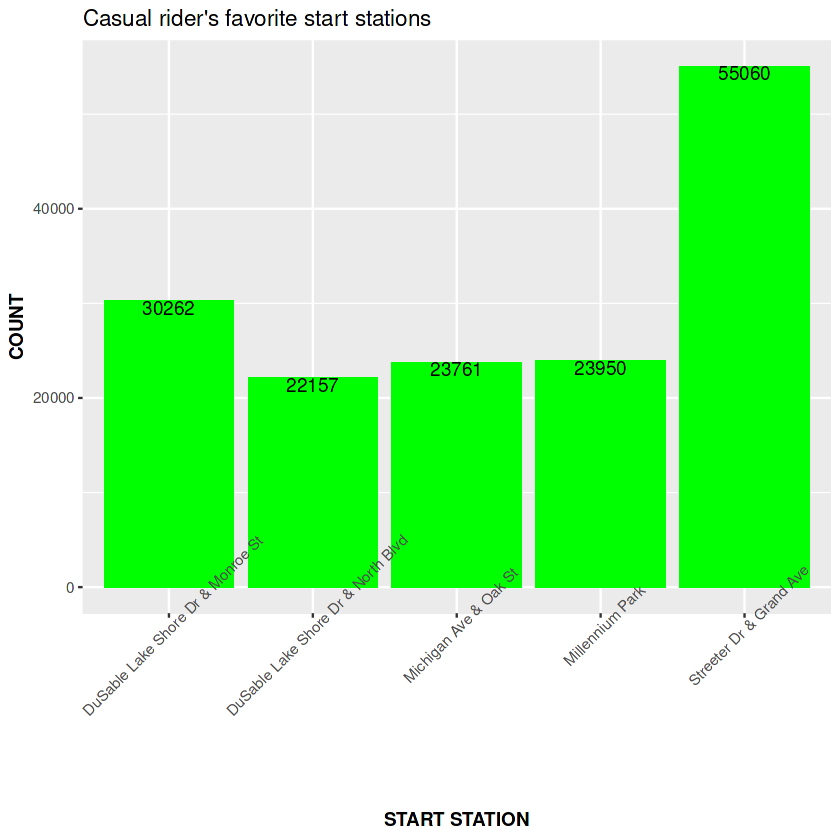

In [42]:
# causal riders top 5 start stations
all_trips_clean %>% 
  filter(member_casual=="casual") %>% 
  group_by(start_station_name) %>% 
  summarise(count=n()) %>% 
  slice_max(count,n=5) %>% 
  ggplot(aes(x=start_station_name,y=count))+geom_col(fill="Green") +
  labs(title = "Casual rider's favorite start stations",x="START STATION",y="COUNT") +
  geom_text(aes(label = count), vjust=1) +
  theme(axis.title = element_text(face="bold"), axis.text.x = element_text(angle = 45))

We can see that the most popular start station for casual riders is Streeter Dr & Grand Ave.

In [43]:
ggsave("casual_topstations_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common start stations for members**

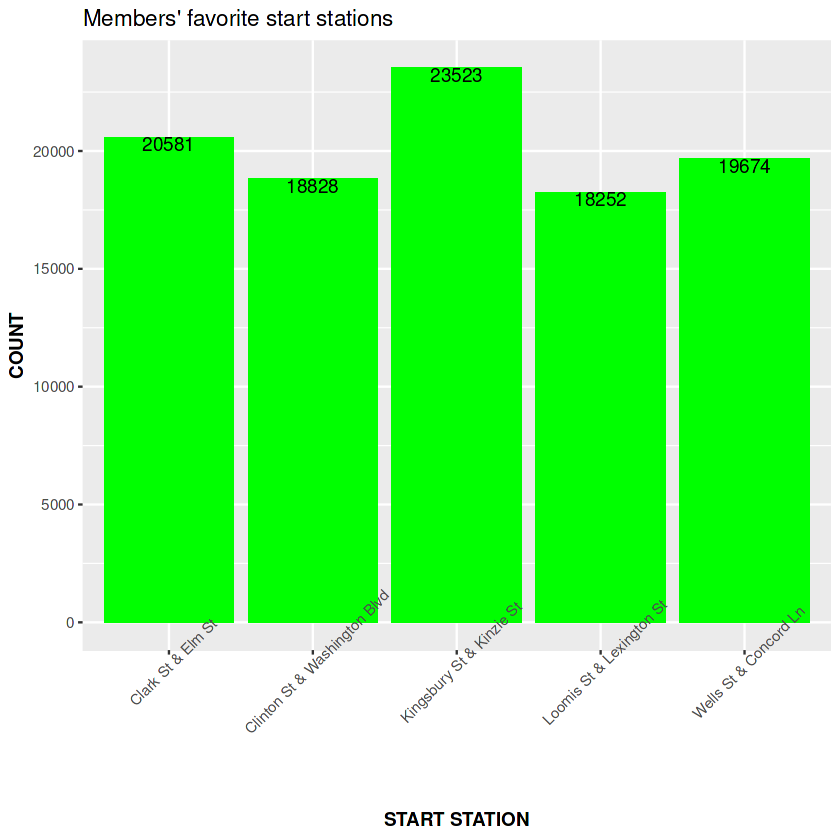

In [44]:
 # members top 5 start stations
all_trips_clean %>% 
  filter(member_casual=="member") %>% 
  group_by(start_station_name) %>% 
  summarise(count=n()) %>% 
  slice_max(count,n=5) %>% 
  ggplot(aes(x=start_station_name,y=count))+geom_col(fill="Green") +
  labs(title = "Members' favorite start stations",x="START STATION",y="COUNT") +
  geom_text(aes(label = count), vjust=1) +
  theme(axis.title = element_text(face="bold"), axis.text.x = element_text(angle = 45))

We can see that the most popular start station for members is Kingsbury St &  Kinzie St.


In [45]:
ggsave("members_topstations_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common end stations for casual riders**

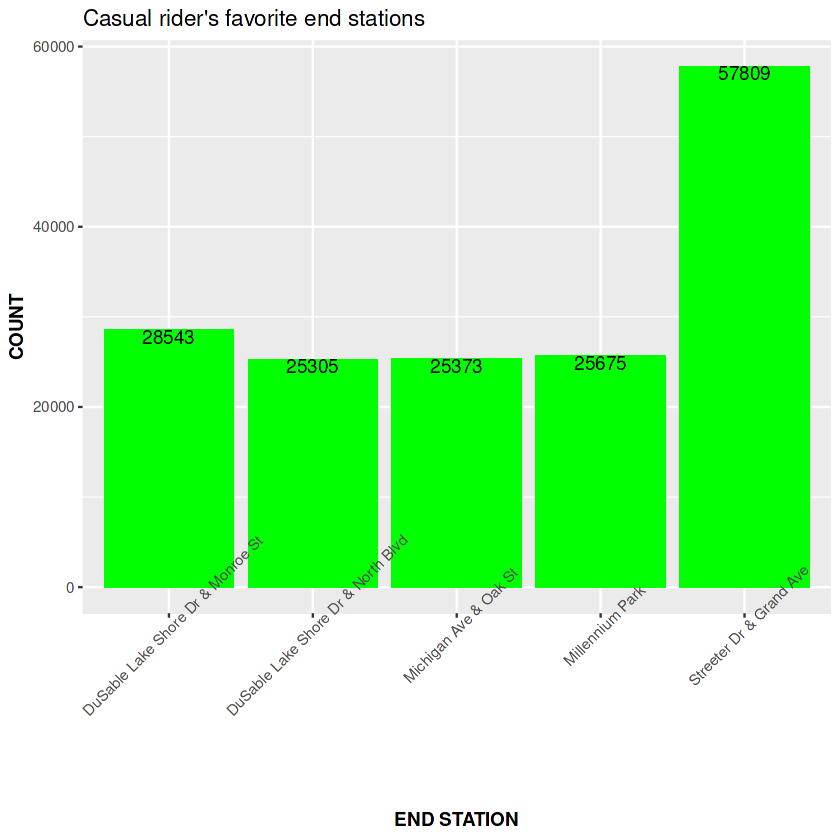

In [46]:
# causal riders top 5 end stations
all_trips_clean %>% 
  filter(member_casual=="casual") %>% 
  group_by(end_station_name) %>% 
  summarise(count=n()) %>% 
  slice_max(count,n=5) %>% 
  ggplot(aes(x=end_station_name,y=count))+geom_col(fill="Green") +
  labs(title = "Casual rider's favorite end stations",x="END STATION",y="COUNT") +
  geom_text(aes(label = count), vjust=1)+
  theme(axis.title = element_text(face="bold"), axis.text.x = element_text(angle = 45))

We can see that the most popular end station for casual riders is Streeter Dr & Grand Ave.

In [47]:
ggsave("casual_top_end_stations_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common end stations for members**

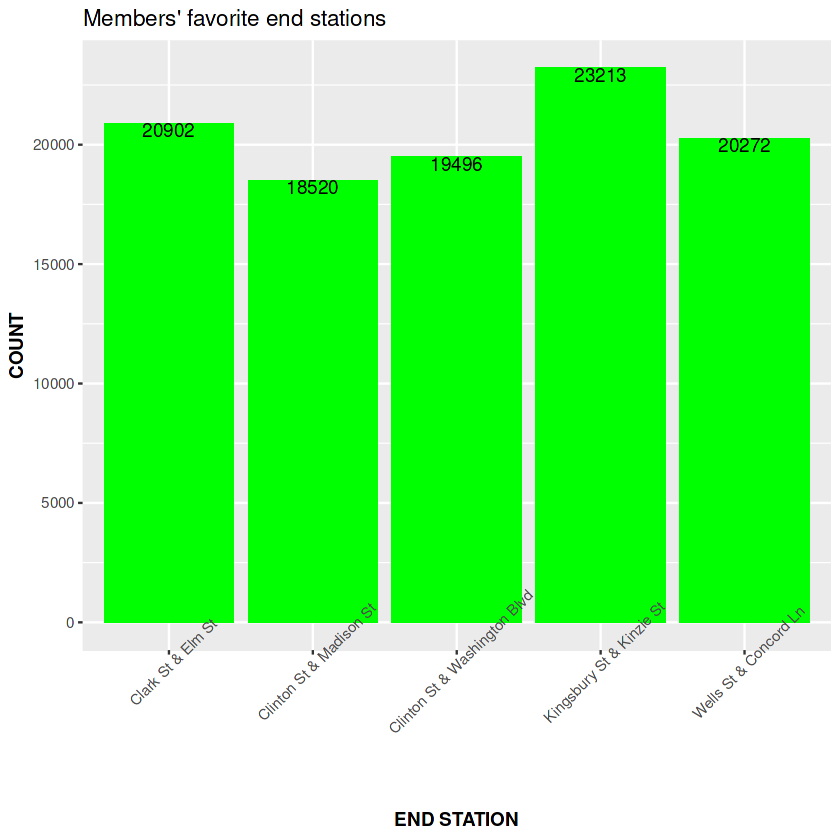

In [48]:
# members top 5 end stations
all_trips_clean %>% 
  filter(member_casual=="member") %>% 
  group_by(end_station_name) %>% 
  summarise(count=n()) %>% 
  slice_max(count,n=5) %>% 
  ggplot(aes(x=end_station_name,y=count))+geom_col(fill="Green")+
  labs(title = "Members' favorite end stations",x="END STATION",y="COUNT") +
  geom_text(aes(label = count), vjust=1) +
  theme(axis.title = element_text(face="bold"), axis.text.x = element_text(angle = 45))

We can see that the most popular end station for members is Kingsbury St &  Kinzie St.

In [49]:
ggsave("members_top_end_stations_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common routes taken by casual riders**

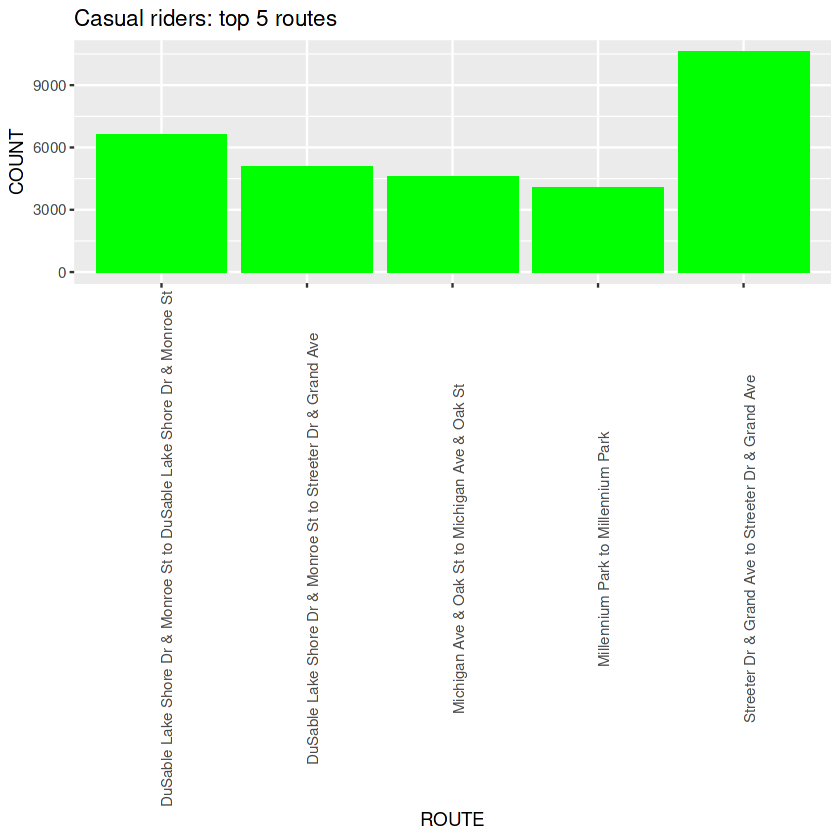

In [50]:
# top 5 routes taken by  casual riders
all_trips_clean %>% filter(member_casual=="casual") %>% 
  group_by(route) %>% 
  summarise(n=n()) %>% 
  arrange(desc(n)) %>% 
  slice_max(n,n=5) %>% 
  ggplot(aes(x=route,y=n))+geom_col(fill="Green") +
  labs(title = "Casual riders: top 5 routes",x="ROUTE",y="COUNT") +
  theme(axis.text.x = element_text(angle = 90))

We can see that the most popular route for casual riders is from Streeter Dr & Grand Ave to Streeter Dr & Grand Ave. This shows that most casual riders start their journey from this station and return to it. 
We can infer that the area including and around this station is the hub of casual riders.

In [51]:
ggsave("casuals_top_routes_viz.png")

Saving 12.5 x 6.67 in image


**Visualizing the most common routes taken by members**

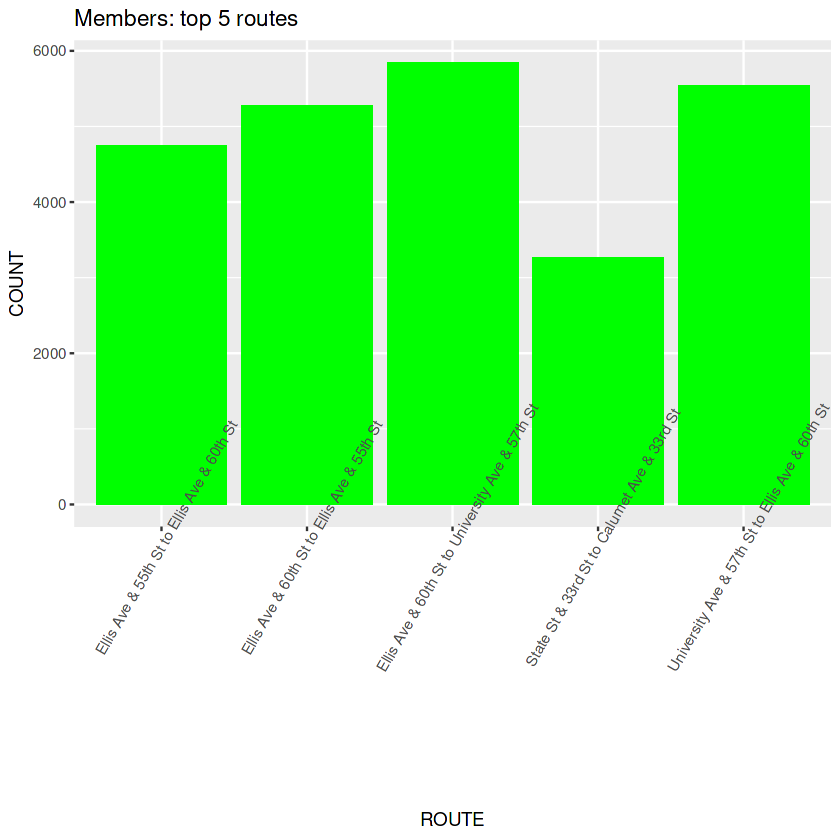

In [52]:
# top 5 routes taken by members
all_trips_clean %>% filter(member_casual=="member") %>% 
  group_by(route) %>% 
  summarise(n=n()) %>% 
  arrange(desc(n)) %>% 
  slice_max(n,n=5) %>% 
  ggplot(aes(x=route,y=n))+geom_col(fill="Green") +
  labs(title = "Members: top 5 routes",x="ROUTE",y="COUNT") +
  theme(axis.text.x = element_text(angle = 60)) 

We can see that the most popular route for members is from Ellis Ave & 60th St to University Ave & 57th St.

In [53]:
ggsave("members_top_routes_viz.png")

Saving 12.5 x 6.67 in image


# Differences between casual riders and members  <a class="anchor"  id="diff"></a>
 
The visualizations generated help showcase some differences in behavior between casual riders and members.

## Average Duration per week day
Average duration of rides of casual riders is greater than that of members for each day of the week. It is highest during the weekend for both casual riders and members. Saturday appear to have the highest average duration for casual riders and Sunday for members. 
We can infer that casual riders enjoy very long rides on the weekend, especially on Saturday.

## Number of rides per week day
The weekend has the highest number of rides for casual riders which is the contrary of that of members where the numbers of rides during the week is greater.
The number of rides on Sat & Sun for casual riders is even greater than that of members. Members have a higher number of rides than casuals during the working week.
This could mean that casual riders mostly use the bikes for leisure, however, members could be using the bikes mostly as a way of transportation to work or school.

## Number of rides per month 
Months June, July and August have the highest number of rides for both casual and member user types, July being the highest for casual riders and August for members. Members ride the bike more than casual riders in every month.

## Most common stations 
**The most popular start stations for casual riders are:**
1) Streeter Dr & Grand Ave 

2) DuSable Lake Shore Dr & Monroe St

3) Millennium Park

4) Michigan Ave & Oak St

5) DuSable Lake Shore Dr & North Blvd

**The most popular start stations for members are:**
1) Kingsbury St &  Kinzie St. 

2) Clark St & Elm St

3) Wells St & Conoord Ln

4) Clinton St & Washington Blvd

5) Loomis St & Lexington St

We can see that their locations  differ.

## Popular routes taken
We can see that the most popular route for casual riders is from Streeter Dr & Grand Ave to Streeter Dr & Grand Ave. This shows that most casual riders start their journey from this station and return to it. 
We could infer that the area including and around this station is the hub of casual riders.
Furthermore, the most popular route for members is from Ellis Ave & 60th St to University Ave & 57th St.
Their most popular routes are different.


# Recommendations for converting casual riders into members  
<a class="anchor"  id="recomm"></a>

1. Place advertisements on the most popular stations for casual riders like "Streeter Dr & Grand Ave" highlighting the perks of being a member with Cyclistic. 

2. Implement a reward system based on points collected for members. The longer they ride the bike, the more points they collect. With the points collected, gifts could be won at the end of each quarter of the year. Since casual members enjoy long bike rides, especially on the weekend, this could motivate them to become members. 

3. Implement summer promotions for membership fee. Casual riders ride more frequently in summer months. Thus, having aggressive summer promotion campaigns would help attract new members.